# IMPORTS

First we started with some python imports. For model building we used the <mark>**segmentation_models_pytorch library**</mark>. This has library has a lot segmentation model architechtures. Before you can import the library it needs to be ensured that the library is installed in the conda environment. For this in the anaconda terminal just type the below command to install the library:-

<div class="alert alert-block alert-success">
<b>Conda Command:</b> conda install -q segmentation-models-pytorch
</div>

Once, the libray is installed it can be imported in the script safely. We also imported the utility script Trainer for model training.

In [1]:
import pandas as pd
import numpy as np
import segmentation_models_pytorch as smp
from Utilities.Trainer import Trainer
import torch
import torch.nn as nn
from torchvision import models
import torch.multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline

The below statement helps in better error tracking when training is done in cuda. More details about this can be found in the below url:-

https://pytorch.org/docs/stable/notes/cuda.html

In [2]:
CUDA_LAUNCH_BLOCKING="1"

# Model Building

Next a FPN model with inceptionv3 encoder was created with imagenet weights from the smp library.

In [3]:
torch.manual_seed(42)
ENCODER = 'xception'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = 6
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation

# create segmentation model with pretrained encoder
model = smp.FPN(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    in_channels=3,
    classes=CLASSES, 
    activation=ACTIVATION,
)
print(model)

FPN(
  (encoder): XceptionEncoder(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (block1): Block(
      (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (rep): Sequential(
        (0): SeparableConv2d(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
          (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

# Model Training

Next the model training was started with 30 epochs and initial learning rate as 5e-04. The model checkpoint was saved whenever the validation dice was reported the greater than the previous best validation dice.

In the below results you can see the training starting from epoch 6. This is because the kernel was initally interuptted after epoch 5. So, I had to start all over again. Since, checkpoint was saved upto epoch number 5 so it started from epoch 6.

In [4]:
lr = 5e-04
epochs = 20
path = "/home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/Models/model_fpn_xception.pth"

In [5]:
model_trainer = Trainer(model, lr, epochs, path)
model_trainer.start()

  0%|          | 0/310 [00:00<?, ?it/s]

Learning Rate =  0.0005
Starting epoch: 0 | phase: train | ⏰: 23:25:37


100%|██████████| 310/310 [10:19<00:00,  1.86s/it, loss=0.0296]
/home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/Utilities/Meter.py:40: RuntimeWarning: Mean of empty slice
  dice_neg = np.nanmean(self.dice_neg_scores)
  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.2371 | IoU: 0.1903 | dice: 0.2562 | dice_neg: nan | dice_pos: 0.2562
Starting epoch: 0 | phase: val | ⏰: 23:35:57


100%|██████████| 133/133 [00:57<00:00,  2.58it/s, loss=0.0105]


Loss: 0.0837 | IoU: 0.4720 | dice: 0.5928 | dice_neg: nan | dice_pos: 0.5928
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 1 | phase: train | ⏰: 23:36:55


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.1291 | IoU: 0.4112 | dice: 0.5288 | dice_neg: nan | dice_pos: 0.5288
Starting epoch: 1 | phase: val | ⏰: 23:47:13


100%|██████████| 133/133 [00:58<00:00,  2.88it/s, loss=0.00906]


Loss: 0.0725 | IoU: 0.5589 | dice: 0.6904 | dice_neg: nan | dice_pos: 0.6904
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 2 | phase: train | ⏰: 23:48:12


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0986 | IoU: 0.4944 | dice: 0.6167 | dice_neg: nan | dice_pos: 0.6167
Starting epoch: 2 | phase: val | ⏰: 23:58:29


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0712 | IoU: 0.5650 | dice: 0.6876 | dice_neg: nan | dice_pos: 0.6876

Learning Rate =  0.0005
Starting epoch: 3 | phase: train | ⏰: 23:59:26


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0846 | IoU: 0.5470 | dice: 0.6711 | dice_neg: nan | dice_pos: 0.6711
Starting epoch: 3 | phase: val | ⏰: 00:09:42


100%|██████████| 133/133 [00:55<00:00,  2.76it/s, loss=0.00802]


Loss: 0.0642 | IoU: 0.6046 | dice: 0.7301 | dice_neg: nan | dice_pos: 0.7301
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 4 | phase: train | ⏰: 00:10:39


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0860 | IoU: 0.5570 | dice: 0.6820 | dice_neg: nan | dice_pos: 0.6820
Starting epoch: 4 | phase: val | ⏰: 00:20:55


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0766 | IoU: 0.5763 | dice: 0.6991 | dice_neg: nan | dice_pos: 0.6991

Learning Rate =  0.0005
Starting epoch: 5 | phase: train | ⏰: 00:21:51


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0782 | IoU: 0.5720 | dice: 0.6971 | dice_neg: nan | dice_pos: 0.6971
Starting epoch: 5 | phase: val | ⏰: 00:32:06


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0612 | IoU: 0.5973 | dice: 0.7191 | dice_neg: nan | dice_pos: 0.7191

Learning Rate =  0.0005
Starting epoch: 6 | phase: train | ⏰: 00:33:04


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0688 | IoU: 0.6065 | dice: 0.7301 | dice_neg: nan | dice_pos: 0.7301
Starting epoch: 6 | phase: val | ⏰: 00:43:20


100%|██████████| 133/133 [00:55<00:00,  2.62it/s, loss=0.00743]


Loss: 0.0594 | IoU: 0.6603 | dice: 0.7808 | dice_neg: nan | dice_pos: 0.7808
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  0.0005
Starting epoch: 7 | phase: train | ⏰: 00:44:16


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0632 | IoU: 0.6322 | dice: 0.7530 | dice_neg: nan | dice_pos: 0.7530
Starting epoch: 7 | phase: val | ⏰: 00:54:31


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0600 | IoU: 0.5936 | dice: 0.7170 | dice_neg: nan | dice_pos: 0.7170

Learning Rate =  0.0005
Starting epoch: 8 | phase: train | ⏰: 00:55:28


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0594 | IoU: 0.6515 | dice: 0.7715 | dice_neg: nan | dice_pos: 0.7715
Starting epoch: 8 | phase: val | ⏰: 01:05:42


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0626 | IoU: 0.6142 | dice: 0.7367 | dice_neg: nan | dice_pos: 0.7367

Learning Rate =  0.0005
Starting epoch: 9 | phase: train | ⏰: 01:06:39


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0571 | IoU: 0.6586 | dice: 0.7757 | dice_neg: nan | dice_pos: 0.7757
Starting epoch: 9 | phase: val | ⏰: 01:16:54


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0570 | IoU: 0.6493 | dice: 0.7685 | dice_neg: nan | dice_pos: 0.7685

Learning Rate =  0.0005
Starting epoch: 10 | phase: train | ⏰: 01:17:52


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0564 | IoU: 0.6655 | dice: 0.7819 | dice_neg: nan | dice_pos: 0.7819
Starting epoch: 10 | phase: val | ⏰: 01:28:05


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0579 | IoU: 0.6529 | dice: 0.7743 | dice_neg: nan | dice_pos: 0.7743
Epoch    11: reducing learning rate of group 0 to 5.0000e-05.

Learning Rate =  5e-05
Starting epoch: 11 | phase: train | ⏰: 01:29:06


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0513 | IoU: 0.6867 | dice: 0.7993 | dice_neg: nan | dice_pos: 0.7993
Starting epoch: 11 | phase: val | ⏰: 01:39:18


100%|██████████| 133/133 [00:55<00:00,  3.28it/s, loss=0.00684]


Loss: 0.0548 | IoU: 0.6690 | dice: 0.7864 | dice_neg: nan | dice_pos: 0.7864
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 12 | phase: train | ⏰: 01:40:15


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0507 | IoU: 0.6987 | dice: 0.8096 | dice_neg: nan | dice_pos: 0.8096
Starting epoch: 12 | phase: val | ⏰: 01:50:27


100%|██████████| 133/133 [01:00<00:00,  3.16it/s, loss=0.00682]


Loss: 0.0546 | IoU: 0.6730 | dice: 0.7897 | dice_neg: nan | dice_pos: 0.7897
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 13 | phase: train | ⏰: 01:51:28


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0475 | IoU: 0.7095 | dice: 0.8177 | dice_neg: nan | dice_pos: 0.8177
Starting epoch: 13 | phase: val | ⏰: 02:01:41


100%|██████████| 133/133 [00:59<00:00,  2.44it/s, loss=0.00671]


Loss: 0.0537 | IoU: 0.6755 | dice: 0.7919 | dice_neg: nan | dice_pos: 0.7919
******** New optimal found, saving state ********


  0%|          | 0/310 [00:00<?, ?it/s]


Learning Rate =  5e-05
Starting epoch: 14 | phase: train | ⏰: 02:02:41


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0464 | IoU: 0.7125 | dice: 0.8204 | dice_neg: nan | dice_pos: 0.8204
Starting epoch: 14 | phase: val | ⏰: 02:12:53


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0560 | IoU: 0.6568 | dice: 0.7739 | dice_neg: nan | dice_pos: 0.7739

Learning Rate =  5e-05
Starting epoch: 15 | phase: train | ⏰: 02:13:49


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0441 | IoU: 0.7178 | dice: 0.8236 | dice_neg: nan | dice_pos: 0.8236
Starting epoch: 15 | phase: val | ⏰: 02:24:01


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0553 | IoU: 0.6599 | dice: 0.7766 | dice_neg: nan | dice_pos: 0.7766

Learning Rate =  5e-05
Starting epoch: 16 | phase: train | ⏰: 02:24:55


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0428 | IoU: 0.7274 | dice: 0.8332 | dice_neg: nan | dice_pos: 0.8332
Starting epoch: 16 | phase: val | ⏰: 02:35:07


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0562 | IoU: 0.6585 | dice: 0.7759 | dice_neg: nan | dice_pos: 0.7759

Learning Rate =  5e-05
Starting epoch: 17 | phase: train | ⏰: 02:36:03


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0434 | IoU: 0.7249 | dice: 0.8305 | dice_neg: nan | dice_pos: 0.8305
Starting epoch: 17 | phase: val | ⏰: 02:46:16


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0573 | IoU: 0.6507 | dice: 0.7687 | dice_neg: nan | dice_pos: 0.7687
Epoch    18: reducing learning rate of group 0 to 5.0000e-06.

Learning Rate =  5e-06
Starting epoch: 18 | phase: train | ⏰: 02:47:13


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0454 | IoU: 0.7234 | dice: 0.8285 | dice_neg: nan | dice_pos: 0.8285
Starting epoch: 18 | phase: val | ⏰: 02:57:26


  0%|          | 0/310 [00:00<?, ?it/s]

Loss: 0.0576 | IoU: 0.6513 | dice: 0.7685 | dice_neg: nan | dice_pos: 0.7685

Learning Rate =  5e-06
Starting epoch: 19 | phase: train | ⏰: 02:58:24


  0%|          | 0/133 [00:00<?, ?it/s]

Loss: 0.0429 | IoU: 0.7235 | dice: 0.8283 | dice_neg: nan | dice_pos: 0.8283
Starting epoch: 19 | phase: val | ⏰: 03:08:37


100%|██████████| 133/133 [00:59<00:00,  2.31it/s, loss=0.00707]

Loss: 0.0566 | IoU: 0.6621 | dice: 0.7789 | dice_neg: nan | dice_pos: 0.7789



After the model training was done the loss, dice_scores and iou_scores were plotted. 

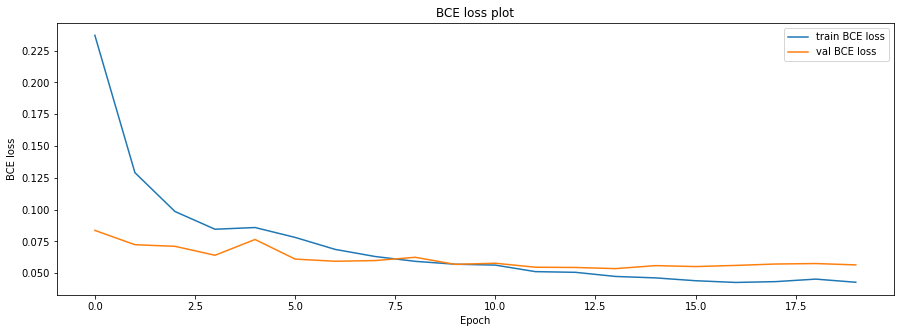

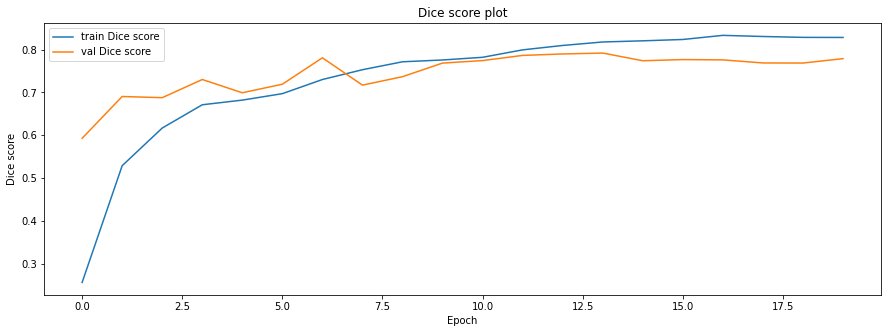

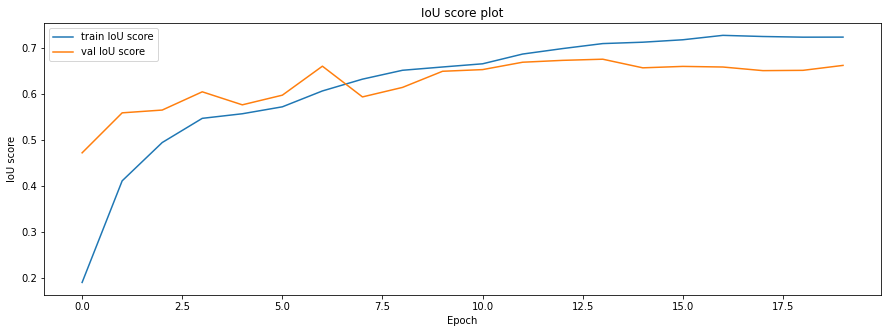

In [6]:
losses = model_trainer.losses
dice_scores = model_trainer.dice_scores # overall dice
iou_scores = model_trainer.iou_scores

def plot(scores, name):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(scores["train"])), scores["train"], label=f'train {name}')
    plt.plot(range(len(scores["train"])), scores["val"], label=f'val {name}')
    plt.title(f'{name} plot'); plt.xlabel('Epoch'); plt.ylabel(f'{name}');
    plt.legend(); 
    plt.show()

plot(losses, "BCE loss")
plot(dice_scores, "Dice score")
plot(iou_scores, "IoU score")

The above results the overall training and validation dice and IoU goes up with epochs and training and validation loss goes down with epochs.

# Convert to ONNX

The trained model is converted to ONNX format using the Utility script ONNX_Converter.py.

In [4]:
! python3 ./Utilities/ONNX_converter.py FPN xception  imagenet  6 /home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/Models/model_fpn_xception.pth /home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/ONNX_models/fpn_xception.onnx

Model name :FPN
Model checkpoint path is :/home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/Models/model_fpn_xception.pth
Model output path is :/home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/ONNX_models/fpn_xception.onnx
Successfully converted the model to onnx format.


# Convert to OpenVINO format

Lastly the trained Onnx model was converted to OpenVINO format for inferencing

In [1]:
! mo.py --input_model /home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/ONNX_models/fpn_xception.onnx --output_dir /home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/OpenVINO_models

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/ONNX_models/fpn_xception.onnx
	- Path for generated IR: 	/home/u71926/My-Notebooks/NEU-SURFACE-DEFECT/OpenVINO_models
	- IR output name: 	fpn_xception
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	None
	- Reverse input channels: 	False
ONNX specific parameters:
	- Inference Engine found in: 	/opt/intel/openvino/python/python3.6/openvino
Inference Engine version: 	2.1.2021.3.0-2787-60059f2c755-releases/2021/3
Model Optimizer version: 	    202